In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 5 notebook

In [2]:
## Load posterior mean dataframe
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))
print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))
print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

mpl.rcParams.update({'font.size': 16})

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 5A: Comparative effects on cumulative feeding for different high-dose PYY administration protocols. Horizontal bars indicate switching to the PYY 300 nmol/kg posterior, mimicking the effects of PYY administration

27.3433228607 2.3566192574


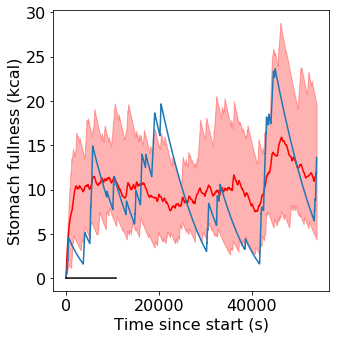

In [3]:
reload(plots)
reload(helpers)

protocol = [(3,'saline_0.0_A_D_trace.p'),
            (6,'PYY_300.0_A_D_trace.p'),
            (3,'GLP-1_300.0_A_D_trace.p'),
            (3,'saline_0.0_A_D_trace.p')]

"""
protocol = [(3, 'saline_0.0_A_D_trace.p'),
            (3, 'sib_0.9_A_D_trace.p'),
            (3, 'saline_0.0_A_D_trace.p'),
            (3, 'sib_0.9_A_D_trace.p')]
"""

fig, axes = plots.dosing_protocol(group_dict, 
                                  protocol, 
                                  num_samples=10)

axes.set_xlabel('Time since start (s)')
axes.set_ylabel('Stomach fullness (kcal)')

## Save figure
fig.tight_layout()
plt.savefig('figures/5A.svg')

plt.show()

## Figure 5B: Optimal dosing protocol for a combination of PYY, leptin, and sibutramine to minimise feeding. Coloured horizontal bars indicate posterior switches as in 5A.

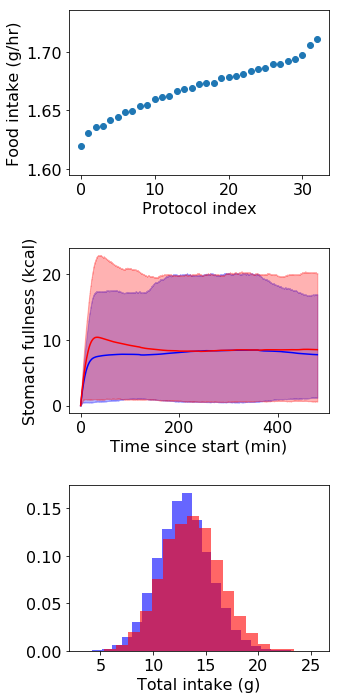

(13.68703386018842, [(2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p')])
(13.15234891680908, [(2, 'LiCl_64.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'PYY_300.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p')])
(12.954954879853053, [(2, 'LiCl_64.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'LiCl_64.0_R_L_trace.p')])
(13.353579895837692, [(2, 'saline_0.0_R_L_trace.p'), (2, 'LiCl_64.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'LiCl_64.0_R_L_trace.p')])


In [6]:
reload(plots)
reload(helpers)

## NOTE: default drug is the first one in the list
druglist = ['saline_0.0_R_L_trace.p',
            'LiCl_64.0_R_L_trace.p',
            'PYY_300.0_R_L_trace.p']

fig, axes, ranked_protocols = plots.optimise_protocols(group_dict, 
                                                       druglist, 
                                                       4, 
                                                       2,
                                                       min_default=2,
                                                       num_samples=10000, 
                                                       cutoff=300,
                                                       pc=5)
## Label axes
axes[0].set_ylabel('Food intake (g/hr)')
axes[0].set_xlabel('Protocol index')

axes[1].set_ylabel('Stomach fullness (kcal)')
axes[1].set_xlabel('Time since start (min)')

axes[2].set_xlabel('Total intake (g)')

## Save figure
fig.tight_layout()
plt.savefig('figures/5B.svg')

plt.show()

print ranked_protocols[-1]
print ranked_protocols[5]
print ranked_protocols[0]
print ranked_protocols[15]

In [11]:
print ranked_protocols[14]

(13.34413144072335, [(2, 'PYY_300.0_R_L_trace.p'), (2, 'PYY_300.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p')])


## Figure 5C: Inter-group variation in response to a behavioural intervention: artificially terminating meals when stomach fullness reaches 15kcal. Posterior mean values coloured by change in mean food intake under behavioural intervention.

In [6]:
reload(plots)
reload(helpers)
"""
for key in group_dict.keys():
    print key
    fig, axes = plots.behav_change_effect_group(group_dict,
                                                key,
                                                15,
                                                num_samples=100,
                                                duration=4*60*60)

    plt.show()
"""

'\nfor key in group_dict.keys():\n    print key\n    fig, axes = plots.behav_change_effect_group(group_dict,\n                                                key,\n                                                15,\n                                                num_samples=100,\n                                                duration=4*60*60)\n\n    plt.show()\n'

## Figure 5D: Response curve for limiting food intake in light and dark ad libitum fed rats

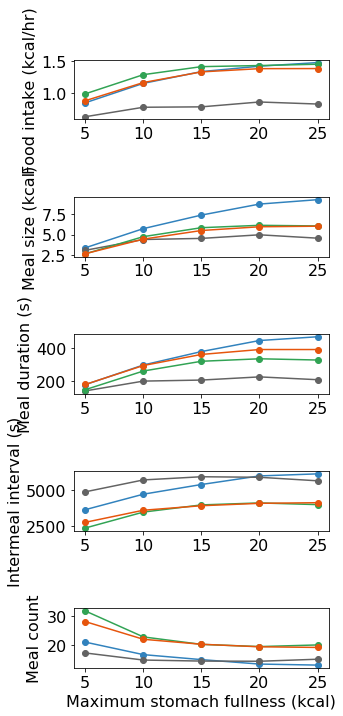

In [7]:
reload(plots)
reload(helpers)
"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p']

"""
indivs = ['saline_0.0_R_D_trace.p',
          'saline_0.0_A_D_trace.p']

"""
fig, axes = plots.behav_response_curve(group_dict,
                                       indivs,
                                       np.linspace(5, 25, 5),
                                       num_samples=100,
                                       duration=24*60*60)

axes[4].set_xlabel('Maximum stomach fullness (kcal)')
axes[0].set_ylabel('Food intake (kcal/hr)')
axes[1].set_ylabel('Meal size (kcal)')
axes[2].set_ylabel('Meal duration (s)')
axes[3].set_ylabel('Intermeal interval (s)')
axes[4].set_ylabel('Meal count')

## Save figure
fig.tight_layout()
plt.savefig('figures/5C.svg')

plt.show()

## Figure 5E: Effect of refractory period on food intake

Generating samples for saline_0.0_R_D_trace.p
Generating samples for PYY_300.0_A_D_trace.p
Generating samples for saline_0.0_A_D_trace.p


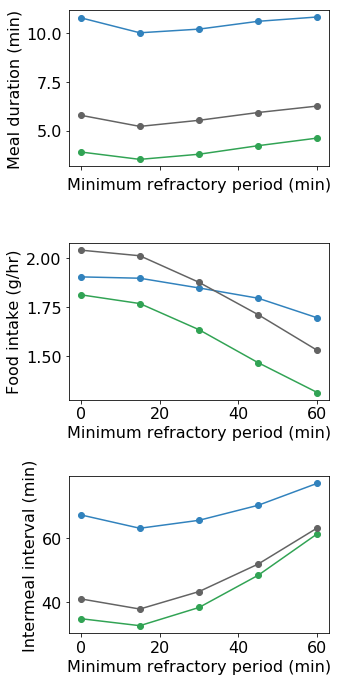

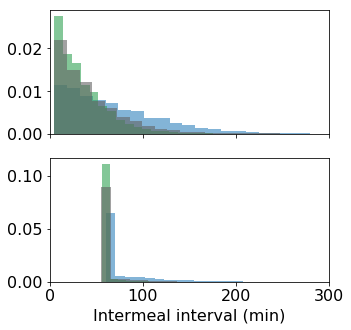

In [5]:
reload(plots)
reload(helpers)
import fwd_sample as fs
reload(fs)

"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""
"""
indivs = ['saline_0.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_D_trace.p',
          'PYY_300.0_A_D_trace.p',
          'saline_0.0_A_D_trace.p']


fig, axes, fig2, axes2 = plots.refractory_period(group_dict,
                                                 indivs,
                                                 np.linspace(60*0, 60*60, 5),
                                                 num_samples=1000,
                                                 duration=8*60*60,
                                                 figsize=(5,9.75))

axes[0].set_xlabel('Minimum refractory period (min)')
axes[1].set_xlabel('Minimum refractory period (min)')
axes[2].set_xlabel('Minimum refractory period (min)')

axes[0].set_ylabel('Meal duration (min)')
axes[1].set_ylabel('Food intake (g/hr)')
axes[2].set_ylabel('Intermeal interval (min)')


axes[0].set_xticklabels([])
#axes[1].set_xticklabels([])


axes2[0].set_xlim([0, 300])
axes2[1].set_xlim([0, 300])
axes2[0].set_xticklabels([])
axes2[1].set_xlabel('Intermeal interval (min)')

## Save figure
fig.tight_layout()
fig.savefig('figures/5E.svg')
fig2.savefig('figures/5F.svg')

plt.show()

## Figure 5G: power calculations - false positive and false negative rates vs sample size

In [9]:
tracefile = 'traces/saline_0.0_R_D_trace.p'
trace = pickle.load(open(tracefile, 'rb'))
print trace

<MultiTrace: 1 chains, 10000 iterations, 12 variables>


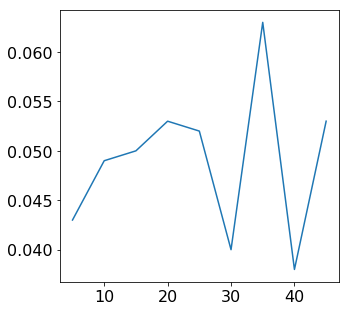

In [10]:
reload(plots)
reload(helpers)
import fwd_likelihoods as fl
reload(fl)

fig, axes = plots.power_study_false_pos(trace, 1000, 0.5*60*60)

plt.show()

In [11]:
tracefile2 = 'traces/saline_0.0_R_L_trace.p'
trace2 = pickle.load(open(tracefile2, 'rb'))

tracefile3 = 'traces/PYY_300.0_R_L_trace.p'
trace3 = pickle.load(open(tracefile3, 'rb'))

In [12]:
reload(plots)
reload(helpers)
import fwd_likelihoods as fl
reload(fl)

t = int(4*60*60)
num_repeats = 1000

## Model-based power study
"""
fig, axes = plots.power_study_false_neg(trace2, 
                                        trace3, 
                                        num_repeats, 
                                        t)
"""

fig, axes = plt.subplots(1)
## Bootstrap comparison
def amts_at_t(folder, t):
    dataset = helpers.group_c_feeding(folder)
    dataset = dataset[:,:t]
    amts = dataset[:,-1]
    return amts

def bootstrap_t_test(group1, group2, samplesize):
    sample1 = np.random.choice(group1, size=samplesize, replace=True)
    sample2 = np.random.choice(group2, size=samplesize, replace=True)
    tstat, pval = scipy.stats.ttest_ind(sample1, sample2, equal_var=False)
    return tstat, pval

sal_data = 'new_all_data/saline_0.0_R_L/'
drug_data = 'new_all_data/PYY_300.0_R_L/'

sal_amts = amts_at_t(sal_data, t)
drug_amts = amts_at_t(drug_data, t)

samplesizes = np.arange(5,55,5)
p_thresh = 0.05

false_neg = []
for samplesize in samplesizes:
    num_accept = 0
    for i in range(num_repeats):
        ## Generate group-level parameters by sampling posterior
        tstat, pval = bootstrap_t_test(sal_amts, drug_amts, samplesize)

        if pval/2 < p_thresh and tstat > 0:
            num_accept += 1.

    false_neg.append(100*(num_repeats - num_accept)/num_repeats)

axes.plot(samplesizes, false_neg, c='k', label='Bootstrap')
axes.legend()

axes.axhline(20, c='k', ls='--')
axes.axvline(8, c='k', ls='--')

axes.set_xlabel('Sample size')
axes.set_ylabel('False negative percentage')

plt.savefig('figures/5H.svg')

plt.show()

NameError: global name 'scipy' is not defined

In [ ]:
import scipy

num_repeats = 1000

mu1 = 2
sd1 = 0.5

mu2 = 1.5
sd2 = 0.5

samplesizes = np.arange(5,50,5)

p_thresh = 0.05

fig, axes = plt.subplots(1)

false_neg = []
for samplesize in samplesizes:
    num_accept = 0
    for i in range(num_repeats):
        group1 = np.random.normal(mu1, sd1, samplesize)
        group2 = np.random.normal(mu2, sd2, samplesize)

        tstat, pval = scipy.stats.ttest_ind(group1, group2, equal_var=False)

        if pval/2 < p_thresh and tstat > 0:
            num_accept += 1.

    false_neg.append(100*(num_repeats - num_accept)/num_repeats)

axes.plot(samplesizes, false_neg)

plt.show()

In [ ]:
def amts_at_t(folder, t):
    dataset = helpers.group_c_feeding(folder)
    dataset = dataset[:,:t]
    amts = dataset[:,-1]
    return amts

sal_data = 'new_all_data/saline_0.0_R_L/'
drug_data = 'new_all_data/PYY_300.0_R_L/'

t = int(4*60*60)
sal_amts = amts_at_t(sal_data, t)
drug_amts = amts_at_t(drug_data, t)

print 'Saline mean %2.2f sd %2.2f' %(np.mean(sal_amts), np.std(sal_amts))
print 'Drug mean %2.2f sd %2.2f' %(np.mean(drug_amts), np.std(drug_amts))

fig, axes = plt.subplots(1)
axes.hist([sal_amts, drug_amts])
plt.show()

sal_feeding = helpers.group_c_feeding(sal_data)
drug_feeding = helpers.group_c_feeding(drug_data)

sal_feeding = sal_feeding.T

min_sal = sal_feeding[~np.isnan(sal_feeding).any(axis=1)]
print min_sal.shape

sal_feeding = sal_feeding.T

fig, axes = plt.subplots(1)
axes.plot(drug_feeding[:,:t].T, c='r', alpha=0.4)
axes.plot(sal_feeding[:,:t].T, c='b', alpha=0.4)
plt.show()

tstat, pval = scipy.stats.ttest_ind(sal_amts, drug_amts, equal_var=False)
print tstat, pval

In [ ]:
def bootstrap_t_test(group1, group2, samplesize):
    sample1 = np.random.choice(group1, size=samplesize, replace=True)
    sample2 = np.random.choice(group2, size=samplesize, replace=True)
    tstat, pval = scipy.stats.ttest_ind(sample1, sample2, equal_var=False)
    return tstat, pval

num_repeats = 1000
samplesizes = np.arange(5,55,5)

fig, axes = plt.subplots(1)

p_thresh = 0.05

false_neg = []
for samplesize in samplesizes:
    num_accept = 0
    for i in range(num_repeats):
        ## Generate group-level parameters by sampling posterior
        tstat, pval = bootstrap_t_test(sal_amts, drug_amts, samplesize)

        if pval/2 < p_thresh and tstat > 0:
            num_accept += 1.

    false_neg.append(100*(num_repeats - num_accept)/num_repeats)

axes.plot(samplesizes, false_neg)
axes.axhline(0.05, c='k', ls='--')
plt.show()